<a href="https://colab.research.google.com/github/durg3sh10/Spam_or_Ham_Classifier/blob/main/Spam_or_Ham_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Our objective is to predict whether a message will be spam or not</b>

### **Context**
###The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Since we have textual data, we will familiarize ourselves with basic Natural Language Processing technqiues so that we can create vector representations of words in our data.

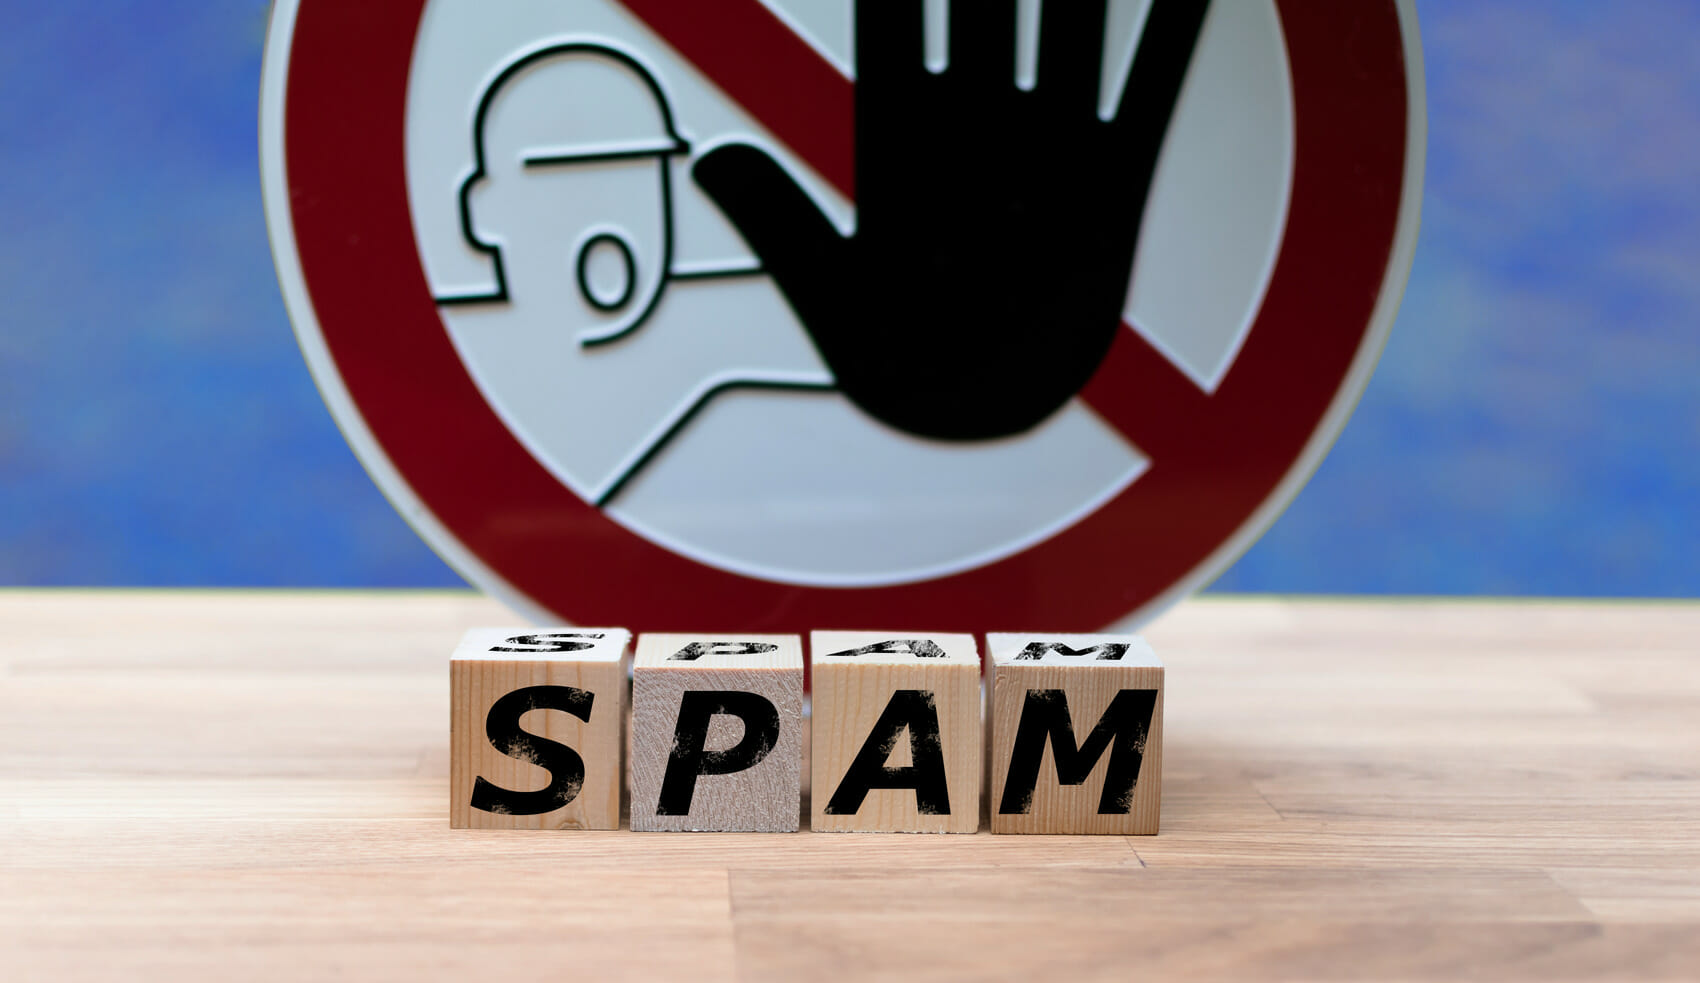

In [33]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the dataset from the csv file using read_csv function of pandas dataframe.

In [34]:
# Importing the dataset
message_df = pd.read_csv("/content/drive/MyDrive/Data science/Alma Better/Machine learning/Naive Bayes Classifier/spam.csv", encoding='latin-1')[['v1', 'v2']]
message_df.columns = ['label', 'message']
message_df.head(4)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


#Data Exploration:-


In [35]:
message_df.shape

(5572, 2)

**Identifying and Handling Duplicate Data:**


It is necessary to determine whether the data we are using has duplicated rows. We are going to identify duplicate rows and remove the duplicate rows.

In [69]:
duplicate_rows = message_df[message_df.duplicated()]
duplicate_rows.shape

(0, 4)

In [68]:
message_df = message_df.drop_duplicates()

**Identifying and Handling Missing Data:**

* In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

* In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

We will detect missing values and handle them in a proper and efficient way by first finding columns with missing values.



In [70]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in message_df.columns if message_df[feature].isnull().sum()>1]
features_with_null_values

[]

In [37]:
message_df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [38]:
message_df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [39]:
message_df['length'] = message_df['message'].apply(len)
message_df.head(3)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


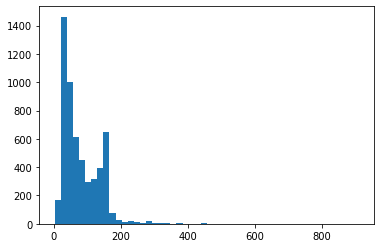

In [40]:
plt.hist("length", data= message_df, bins= 50);

In [41]:
message_df["length"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

## <b> Text Pre-processing </b>

### Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words  approach, where each unique word in a text will be represented by one number.


### In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).



In [42]:
#Natural Language Toolkit
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###To check the list of stopwords we can type the following commands in the python shell.

In [43]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Let us write a function which removes punctuation and stopwords from our data

In [44]:
import string
x = [punctuations for punctuations in string.punctuation]
print(x)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


## Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [45]:
def text_processing(msg):
  no_punctuations = [char for char in msg if char not in string.punctuation]
  no_punctuations =''.join(no_punctuations)
  return " ".join([word for word in no_punctuations.split() if word.lower() not in stopwords.words("english")])

In [46]:
message_df["Tokenized_message"] = message_df.apply(lambda x: text_processing(x["message"]), axis = 1)

In [47]:
message_df.head(3)

,label,message,length,Tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...


## <b> Vectorization </b>

### Currently, we have the messages as lists of tokens and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

### Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

### We'll do that in three steps using the bag-of-words model:

  1. ###  Count how many times does a word occur in each message (Known as term frequency)

  2. ### Weigh the counts, so that frequent tokens get lower weight

  3. ### Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


### Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

### We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 


### Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

### Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [49]:
vectorizer = CountVectorizer(max_df= 0.9, min_df= 10)
X = vectorizer.fit_transform(message_df["Tokenized_message"])

In [50]:
message_df.iloc[3]["Tokenized_message"]

'U dun say early hor U c already say'

In [51]:
X.toarray().shape

(5572, 872)

In [52]:
print(vectorizer.get_feature_names())

['0800', '08000839402', '08000930705', '10', '100', '1000', '10p', '12', '12hrs', '150', '150p', '150pm', '150pmsg', '150ppm', '16', '18', '1st', '200', '2000', '2003', '250', '2nd', '300', '350', '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola', 'able', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah', 'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap', 'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz', 'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout', 'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'buy', 'call', 'called', '

In [53]:
len(vectorizer.get_feature_names())

872

In [54]:
# Feature
vectorizer.get_feature_names()[120]

'cant'

####Train - Test Split :
Separating data into training and testing sets is an important part of evaluating data mining models

In [55]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(message_df['Tokenized_message'], message_df['label'], test_size = 0.2)

In [56]:
msg_train.head()

2168                                      Thx well months
3646                   Hey babe friend cancel still visit
342                                     u hiding stranger
5251    Yeah work fine started last week stuff dull ea...
3300                   RCT THNQ Adrian U text Rgds Vatian
Name: Tokenized_message, dtype: object

In [57]:
label_train.head()

2168     ham
3646     ham
342      ham
5251     ham
3300    spam
Name: label, dtype: object

### With messages represented as vectors, we can finally train our spam/ham classifier. Now we can use Naive Bayes Classifier to perform this classification task

In [58]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [59]:
train_array = train_vectorized.toarray()
test_array = test_vectorized.toarray()

#Naive Bayes Classifier

### Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.


### Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features,   P(L | features). 

### Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

#### $P(L ~|~ \rm features)=\frac{P(\rm features ~|~ L) P(L)}{P(\rm features)}$


In [60]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(train_array, label_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
train_predict = spam_detect_model.predict(train_array)
test_predict = spam_detect_model.predict(test_array)

In [63]:
cm = confusion_matrix(label_test, test_predict)
cm

array([[975,  13],
       [ 13, 114]])

In [64]:
print(classification_report(test_predict, label_test))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       988
        spam       0.90      0.90      0.90       127

    accuracy                           0.98      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.98      0.98      0.98      1115

